# Actual vs Target Line Plots

# Document information

## Work to do

- Regression line using non-patsy formulae
- Confidence interval
- Prediction interval

<table align="left">
    <tr>
        <th class="text-align:left">Title</th>
        <td class="text-align:left">Line plot, performance to target</td>
    </tr>
    <tr>
        <th class="text-align:left">Last modified</th>
        <td class="text-align:left">2020-01-20</td>
    </tr>
    <tr>
        <th class="text-align:left">Author</th>
        <td class="text-align:left">Gilles Pilon <gillespilon13@gmail.com></td>
    </tr>
    <tr>
        <th class="text-align:left">Status</th>
        <td class="text-align:left">Active</td>
    </tr>
    <tr>
        <th class="text-align:left">Type</th>
        <td class="text-align:left">Jupyter notebook</td>
    </tr>
    <tr>
        <th class="text-align:left">Created</th>
        <td class="text-align:left">2019-01-24</td>
    </tr>
    <tr>
        <th class="text-align:left">File name</th>
        <td class="text-align:left">line_plot_actual_vs_target.ipynb</td>
    </tr>
    <tr>
        <th class="text-align:left">Other files required</th>
        <td class="text-align:left">actual_vs_target.csv</td>
    </tr>
</table>

# Introduction

This notebook plots:

- Target value vs month of the year, as a line
- Actual value vs month of the year, as dots

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.axes as axes
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.dates import DateFormatter, MonthLocator
from matplotlib.ticker import NullFormatter, NullLocator

In [2]:
matplotlib.use('Cairo')
c = cm.Paired.colors
pd.plotting.register_matplotlib_converters(explicit=True)
%matplotlib inline
%config InlineBacken.figure_format = 'svg'

In [3]:
def main():
    data = pd.read_csv('actual_vs_target.csv', parse_dates=['Date'])
    x_axis_label, y_axis_label, axis_title = ('Date', 'USD',
                                              'Savings Target vs Actual')
    data = regression(data)
    ax = plot_three_lines(data, axis_title, x_axis_label, y_axis_label)
    despine(ax)
    ax.figure.savefig('actual_vs_target.svg', format='svg')
    ax.figure.savefig('actual_vs_target.png', format='png')

In [4]:
def despine(ax: axes.Axes) -> None:
    '''
    Remove the top and right spines of a graph.

    There is only one x axis, on the bottom, and one y axis, on the left.
    '''
    for spine in 'right', 'top':
        ax.spines[spine].set_visible(False)

In [5]:
def plot_three_lines(data, axis_title, x_axis_label, y_axis_label):
    figure_width_height = (8, 6)
    fig = plt.figure(figsize=figure_width_height)
    ax = fig.add_subplot(111)
    ax.plot(data['Date'], data['Target'], label='Target',
            linestyle='-', color=c[0])
    ax.plot(data['Date'], data['Actual'], label='Actual', marker='o',
            linestyle='-', color=c[1])
    ax.plot(data['Date'], data['Predicted'], label='Predicted',
            linestyle='-', color=c[2])
    ax.set_title(axis_title, fontweight='bold')
    ax.set_xlabel(x_axis_label, fontweight='bold')
    ax.set_ylabel(y_axis_label, fontweight='bold')
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_minor_locator(NullLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%y-%m'))
    ax.xaxis.set_minor_formatter(NullFormatter())
    ax.legend(frameon=False)
    return ax

In [6]:
def regression(data: pd.DataFrame) ->pd.DataFrame:
    '''
    Estimate a linear regression line
    Y is a float
    X is a datetime64ns
    Convert X to a float with first value set to 0 number of days between
    subsequent values
    '''
    data['DateDelta'] = (data['Date'] - data['Date'].min())/np.timedelta64(1, 'D')
    model = sm.OLS(data['Actual'], sm.add_constant(data['DateDelta']), missing='drop').fit()
    data['Predicted'] = model.fittedvalues
    return data

/usr/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


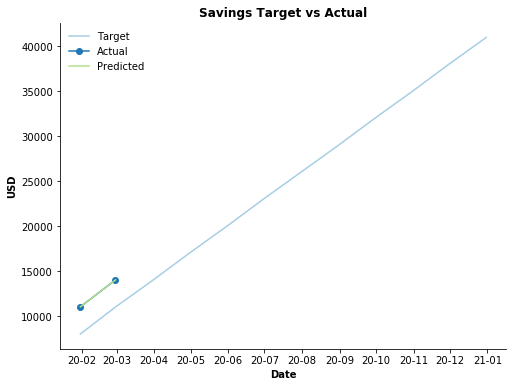

In [7]:
if __name__ == '__main__':
    main()